## Step 1: Data understanding and EDA
    - Read and understand the data
    - Do EDA on the data

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import all the libraries required
import numpy as np
import pandas as pd

#Import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

#Import statsmodels Linear Regression library
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

#Import sklearn Linear Regression library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE


from sklearn.metrics import r2_score #to 

In [3]:
# Load the data

df = pd.read_csv('day.csv')

In [4]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
#Check the shape of dataset
df.shape   #total rows are 730 and columns are 16

(730, 16)

In [6]:
df.info()  
df.isnull().sum()  #Check the null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### Above info confirms there is not any missing data for any of the column. 

In [7]:
#Check for duplicate data in rows
df.drop_duplicates(inplace=True)
df.shape

(730, 16)

#### Above info confirms there is not any duplicate data in any rows as shape is same before and after the drop_duplicates

In [8]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### More cleaning ... 
    - Remove unnecessary columns like instant ( as this is index only ) , dteday (as we can construct date from month/year) , casual , registered ( as this is the segregation of cnt column ) 
    - Rename few columns like yr:year mnth to month

In [9]:
df.drop(['instant','dteday', 'casual','registered'], axis=1, inplace=True )

In [10]:
#Rename few columns like yr:year mnth to month , hum to humididy 
df.rename(columns = {'yr':'year' , 'mnth':'month' , 'hum':'humidity'}, inplace = True)

In [11]:
df.head()


,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Encoding/Mapping the data 
    -Before visualize we can map the corresponding number to their actual meaning for better readability
    Ex. season : season --> (1:spring, 2:summer, 3:fall, 4:winter)
    Ex. year --> (0: 2018, 1:2019)
	Ex. month --> ( 1 to 12)
    Ex. weekday --> day of the week
    Ex. weathersit : 
		- 1: Clear/Few clouds
		- 2: Mist Cloud
		- 3: Light Snow/Thunderstorm/Clouds
		- 4: Heavy Rain/Thunderstrom/Snow 
    

In [12]:
#Mapping the season column to actual values

df['season'] = df['season'].map( { 1:'spring', 2:'summer', 3:'fall', 4:'winter'} )

#Mapping the year column to actual values
df['year'] = df['year'].map( { 0:'2018', 1:'2019'} )

#Mapping the month column to actual values
df['month'] = df['month'].map({ 1:'Jan', 2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'} )

#Mapping the month column to actual values
df['weekday'] = df['weekday'].map({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})

#Mapping the month column to actual values
df['weathersit'] = df['weathersit'].map( {1:'Clear/Few clouds',2:'Mist Cloud',3:'Light Snow/Thunderstorm/Clouds',4:'Heavy Rain/Thunderstrom/Snow'} )



In [13]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

    - Let's now spend some time doing what is arguably the most important step - understanding the data.
    - If there is some obvious multicollinearity going on, this is the first place to catch it.
    -Here's where we'll also identify if some predictors directly have a strong association with the outcome variable


### Visualising Numeric Variables
    
    - Let's make a pairplot of all the numeric variables
    - Numerical Variables includes continuous numerical variable like temp , atemp , humidity ,windspeed , cnt

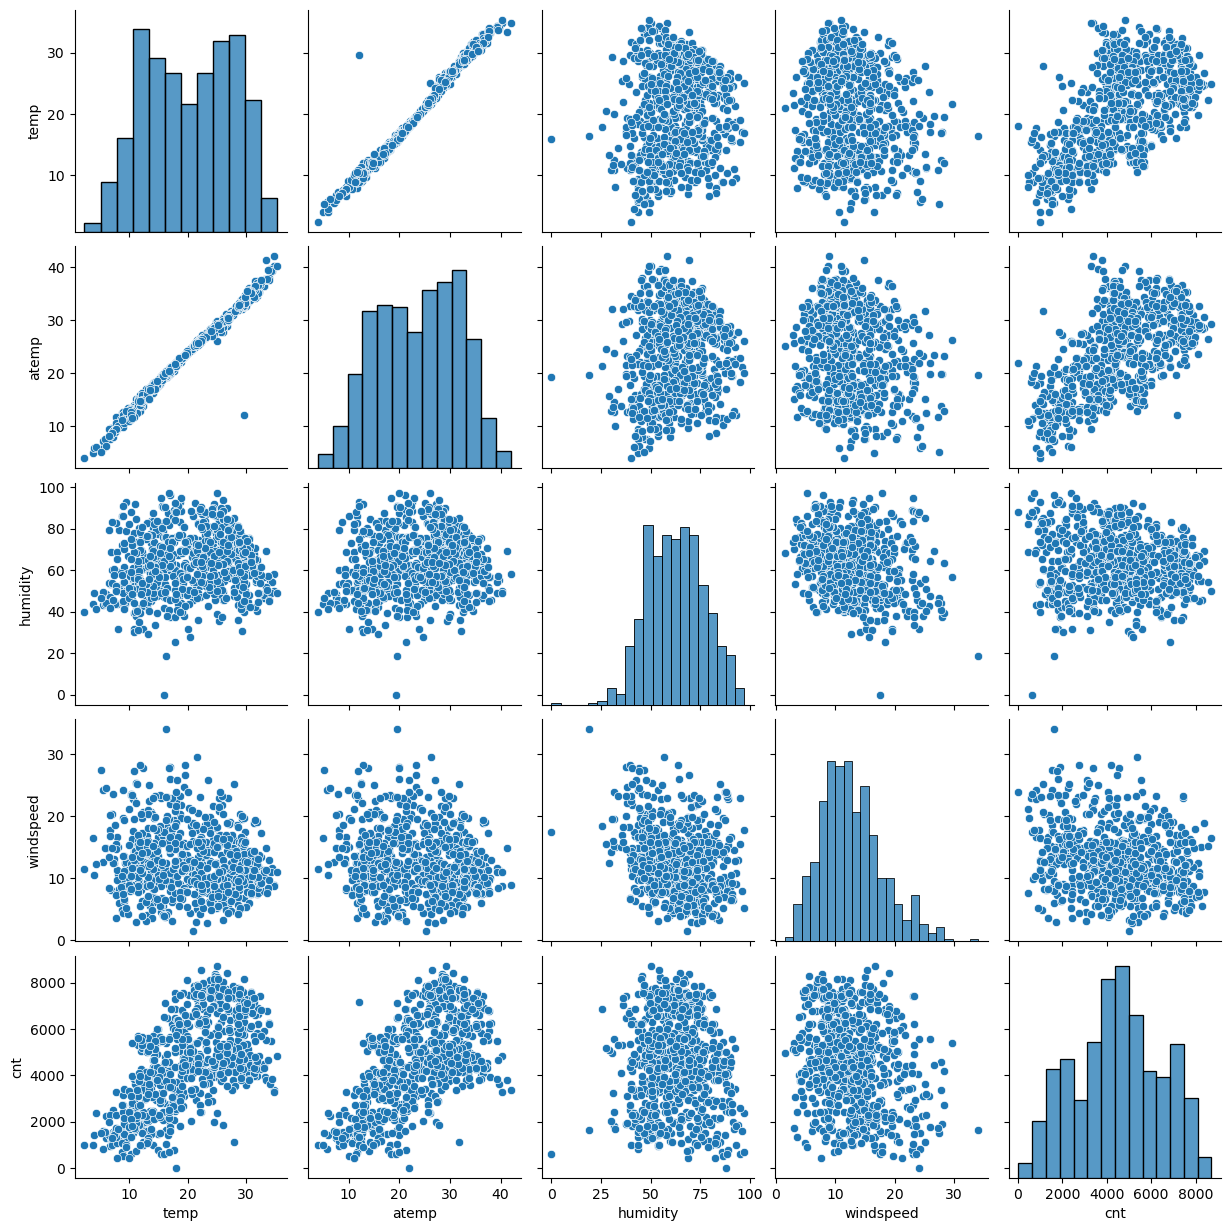

In [14]:
sns.pairplot(df[['temp', 'atemp' , 'humidity' , 'windspeed' , 'cnt']])
plt.show()

#### Few Observations from above pairwise plots ...
    1. Clearly cnt seems to have strong linear relation with temp and atemp
    2. temp and atemp ( predictor/independent variables ) seems to have multicollinearity (highly corelated) 

#### Verify the above claims using heatmap ...

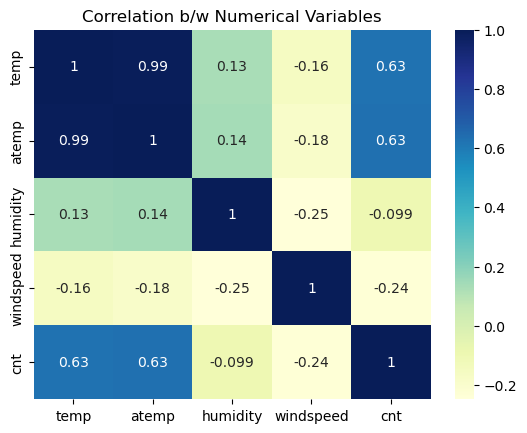

In [15]:
sns.heatmap(df[['temp', 'atemp' , 'humidity' , 'windspeed' , 'cnt']].corr(), annot = True , cmap="YlGnBu")
plt.title("Correlation b/w Numerical Variables")
plt.show()

#### Clearly
    - temp and atemp seems to be very highly corelated
    - cnt(target variable ) has strong co-relation with temp/atemp

#### Also verify the multicollinearity using VIF 

In [16]:

X = df[['temp' ,'atemp' , 'humidity' , 'windspeed' , 'cnt']]

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,atemp,563.99
0,temp,490.64
2,humidity,11.08
4,cnt,10.30
3,windspeed,4.68


##### Note 1 : 
    - As you can see from above, VIF value for atemp is way above 5! 
    - But we will decide which predictor variables to remove based on combination of p-value and VIF once we train the model.

#Drop atemp due to high multicollinearity with other variable which might otherwise lead to several issues in the model, including unstable or unreliable coefficient estimates, inflated standard errors, and reduced predictive accuracy.
#df.drop(['atemp'] , axis=1 , inplace=True )


#Re-analyze the VIF with remaining numerical variables
X = df[['temp' , 'humidity' , 'windspeed' , 'cnt']]

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

### Visualising Categorical Variables against the taget variable
    
    - season , year , month , holiday , weekday, workingday , weathersit
    - use bar plot and box plot for the same

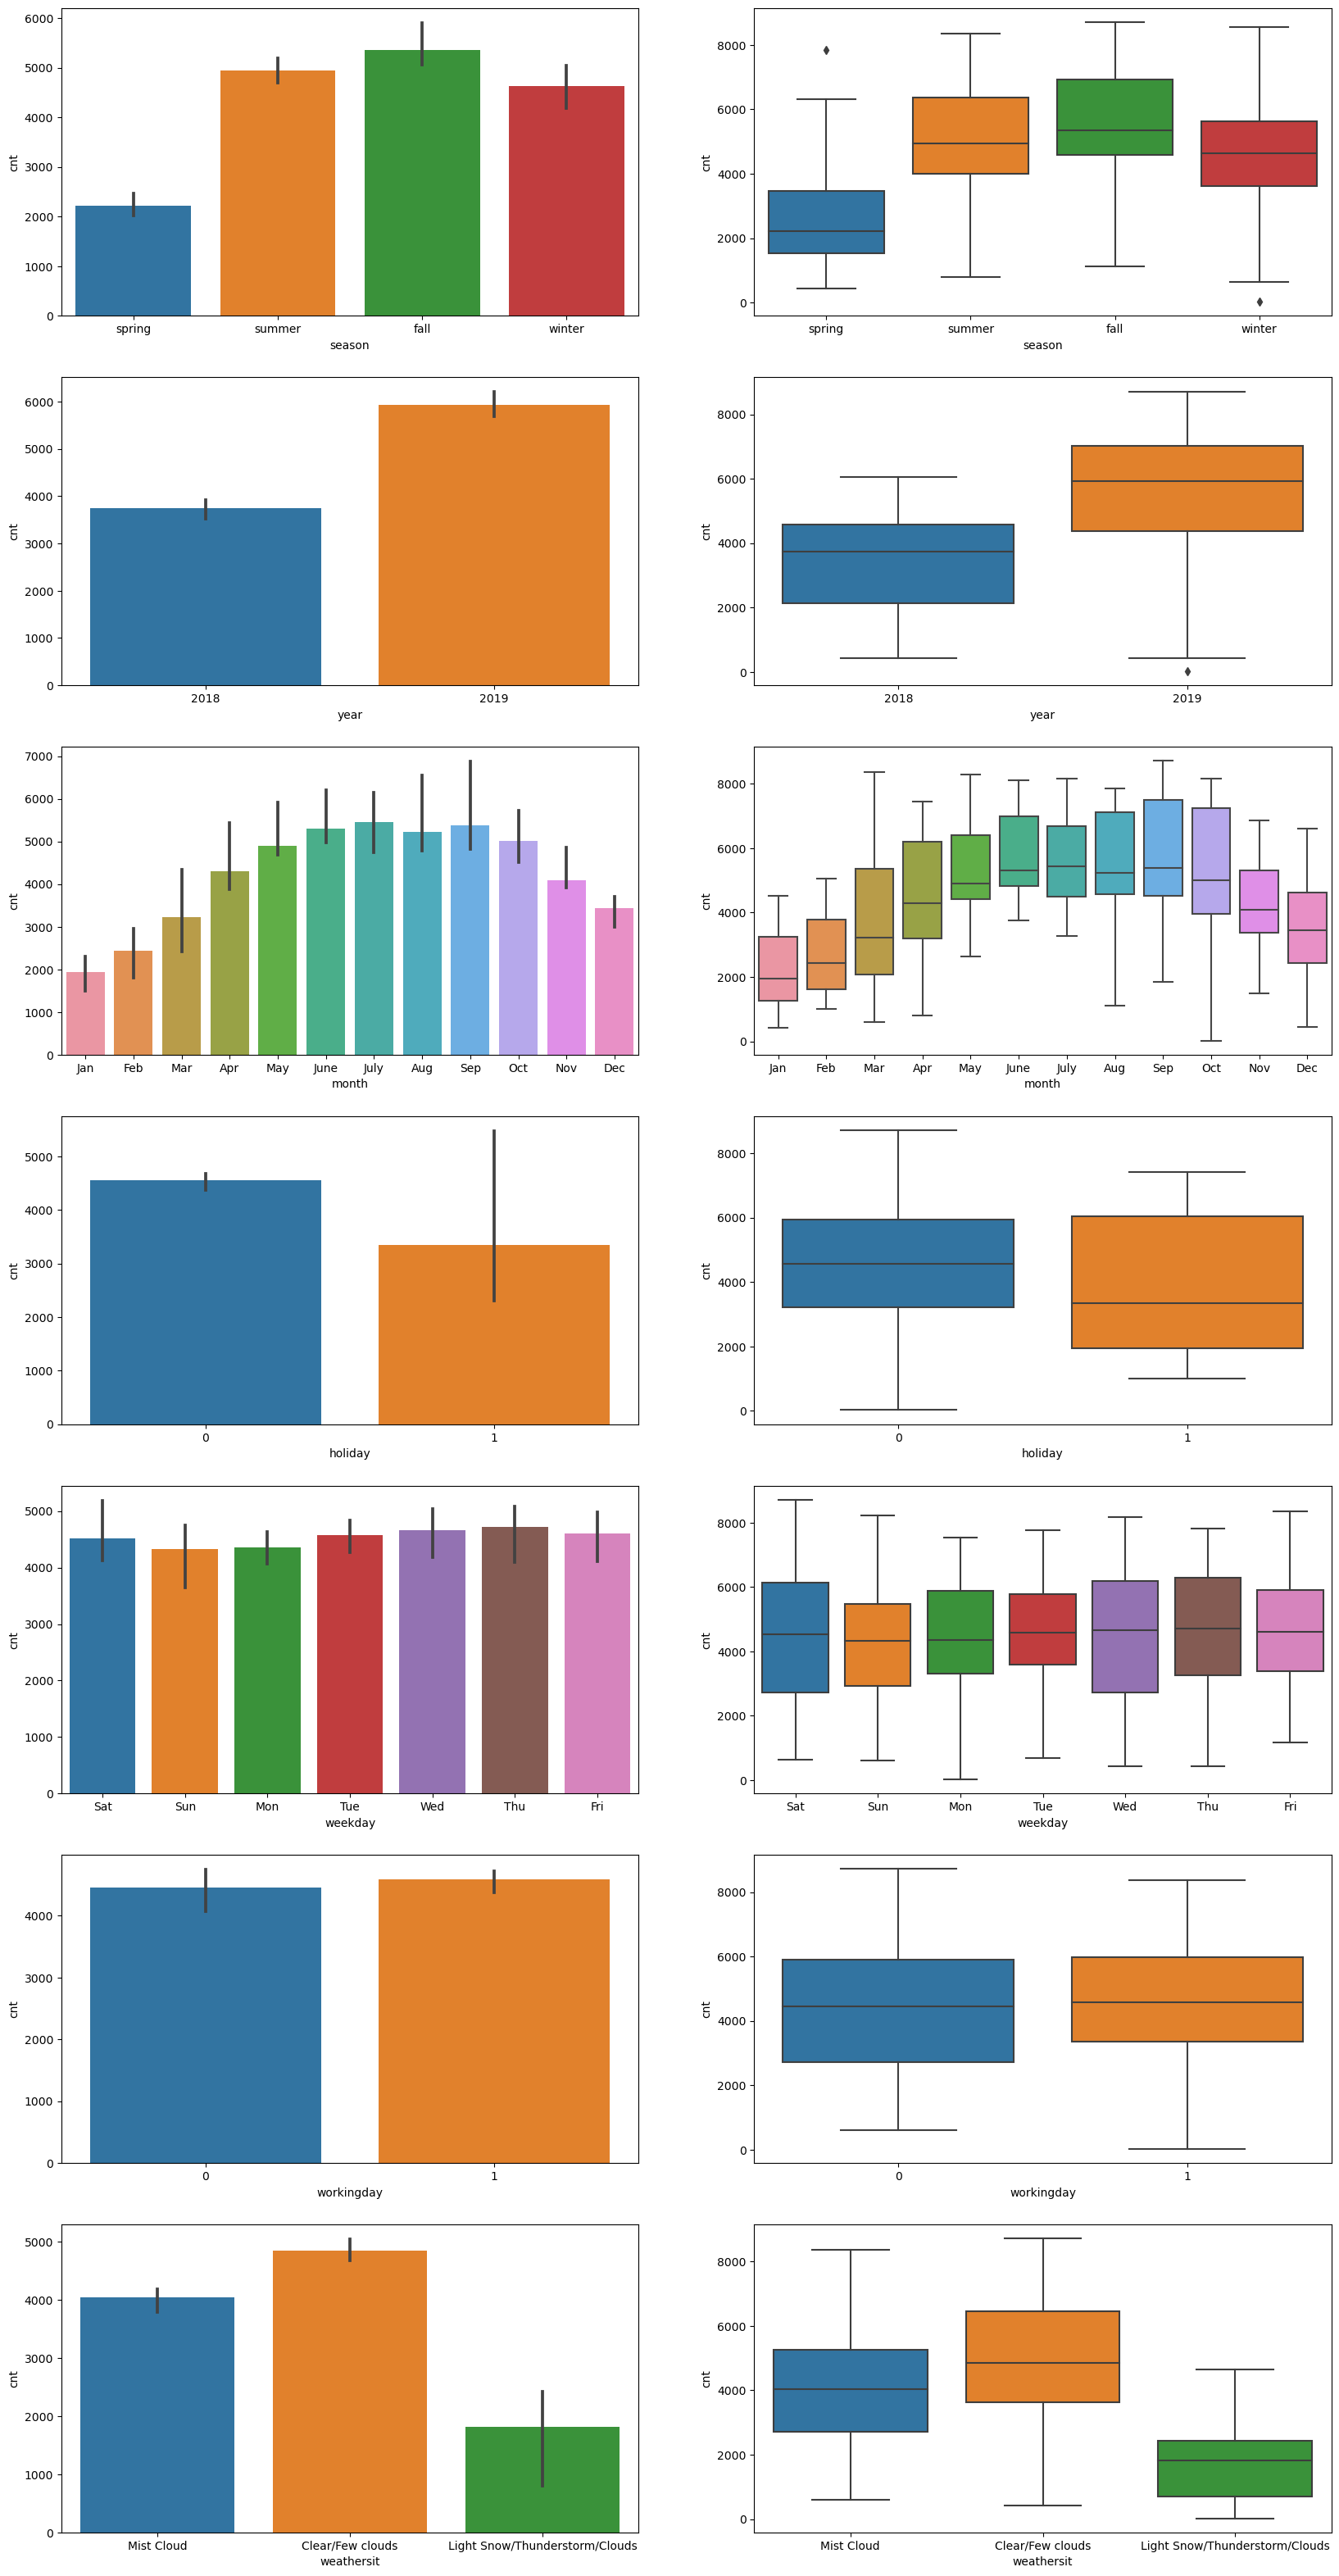

In [17]:
fig, axes = plt.subplots(7,2, figsize=(20, 40))  #subplot of 6X2
sns.barplot(df['season'], df['cnt'], estimator=np.median , ax = axes[0][0]  )
sns.boxplot( df['season'] , df['cnt'], ax = axes[0][1] )

sns.barplot(df['year'], df['cnt'], estimator=np.median , ax = axes[1][0]  )
sns.boxplot( df['year'] , df['cnt'], ax = axes[1][1] )

sns.barplot(df['month'], df['cnt'], estimator=np.median , ax = axes[2][0]  )
sns.boxplot( df['month'] , df['cnt'], ax = axes[2][1] )

sns.barplot(df['holiday'], df['cnt'], estimator=np.median , ax = axes[3][0]  )
sns.boxplot( df['holiday'] , df['cnt'], ax = axes[3][1] )

sns.barplot(df['weekday'], df['cnt'], estimator=np.median , ax = axes[4][0]  )
sns.boxplot( df['weekday'] , df['cnt'], ax = axes[4][1] )

sns.barplot(df['workingday'], df['cnt'], estimator=np.median , ax = axes[5][0]  )
sns.boxplot( df['workingday'] , df['cnt'], ax = axes[5][1] )

sns.barplot(df['weathersit'], df['cnt'], estimator=np.median , ax = axes[6][0]  )
sns.boxplot( df['weathersit'] , df['cnt'], ax = axes[6][1] )


plt.show()

#### Few Observations from above plots ...
    
   1. Season - Fall season has more booking for rental bikes
   2. Year - Booking has increased in year 2019 as compared to 2018. Shows good trend in general.
   3. Month - With in an year , July month has atracted more rentals. But in general most bookings are done from May-       Oct
   4. Holiday - Attracted more booking even on non-holiday
   5. Weekday - Almost same distribution of rentals across whole week.
   6. Workingday - Rental bookings are almost same on working and non-working day.
   7. Weathersit - Clearly more bookings on Clear/FewClouds and Mist Cloud. Lowest booking on Light Snow/Thunderstorm       days

## Step 3: Data Preparation
    
    - Dummy variable creation for categorical varibles like season , month , weekday , weathersit
    - Note :year has 2018 and 2019 as values - Convert it directly to 0/1 using encoding techinuqe.
    - Dropping season , month , weekday , weathersit columns after dummy variables creation.
    
##### Need - dummy variables allows us to incorporate categorical variables into a regression model and estimate the effect of each category or level on the outcome variable.

In [18]:
df.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,Jan,0,Sat,0,Mist Cloud,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,Sun,0,Mist Cloud,14.902598,17.68695,69.6087,16.652113,801
2,spring,2018,Jan,0,Mon,1,Clear/Few clouds,8.050924,9.47025,43.7273,16.636703,1349
3,spring,2018,Jan,0,Tue,1,Clear/Few clouds,8.200000,10.60610,59.0435,10.739832,1562
4,spring,2018,Jan,0,Wed,1,Clear/Few clouds,9.305237,11.46350,43.6957,12.522300,1600


In [19]:
# Dummy variable creation for month, weekday, weathersit and season variables.

df_season = pd.get_dummies( df['season'], drop_first=True )
df_month = pd.get_dummies( df['month'] , drop_first=True )
df_weekday= pd.get_dummies(df['weekday'], drop_first=True )
df_weathersit = pd.get_dummies( df['weathersit'], drop_first=True )

#Mapping the year column to actual 0/1 values
df['year'] = df['year'].map( { '2018':0, '2019':1} )

In [20]:
# Merging above dataframes, having dummy variables.  

df = pd.concat( [df,df_season,df_month,df_weekday,df_weathersit] , axis=1 )

In [21]:
#Dropping season , month , weekday , weathersit columns after dummy variables creation. 

df.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True )

In [22]:
df.shape   #Total rows and columns are 730X30 now


(730, 30)

## Step 4: Splitting the Data into Training and Test Set

In [23]:
# Splitting the dataset into Train and Test Set

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, random_state = 100)

In [24]:
print ( df_train.shape ) 
print ( df_test.shape )


(510, 30)
(220, 30)


### Rescaling the Features 
    - It is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large  or very small as compared to the other coefficients.
    - Use Min-Max scaling 

In [25]:
# Using MinMaxScaler to Rescaling the features

scaler = MinMaxScaler()

# Apply scaler() to all the columns except'dummy'  or varibles having state as 0 and 1
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])   #We do fit and transform on training set

In [26]:
# Check the scaled train dataset
df_train.describe()


,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Thunderstorm/Clouds,Mist Cloud
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.345098
std,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


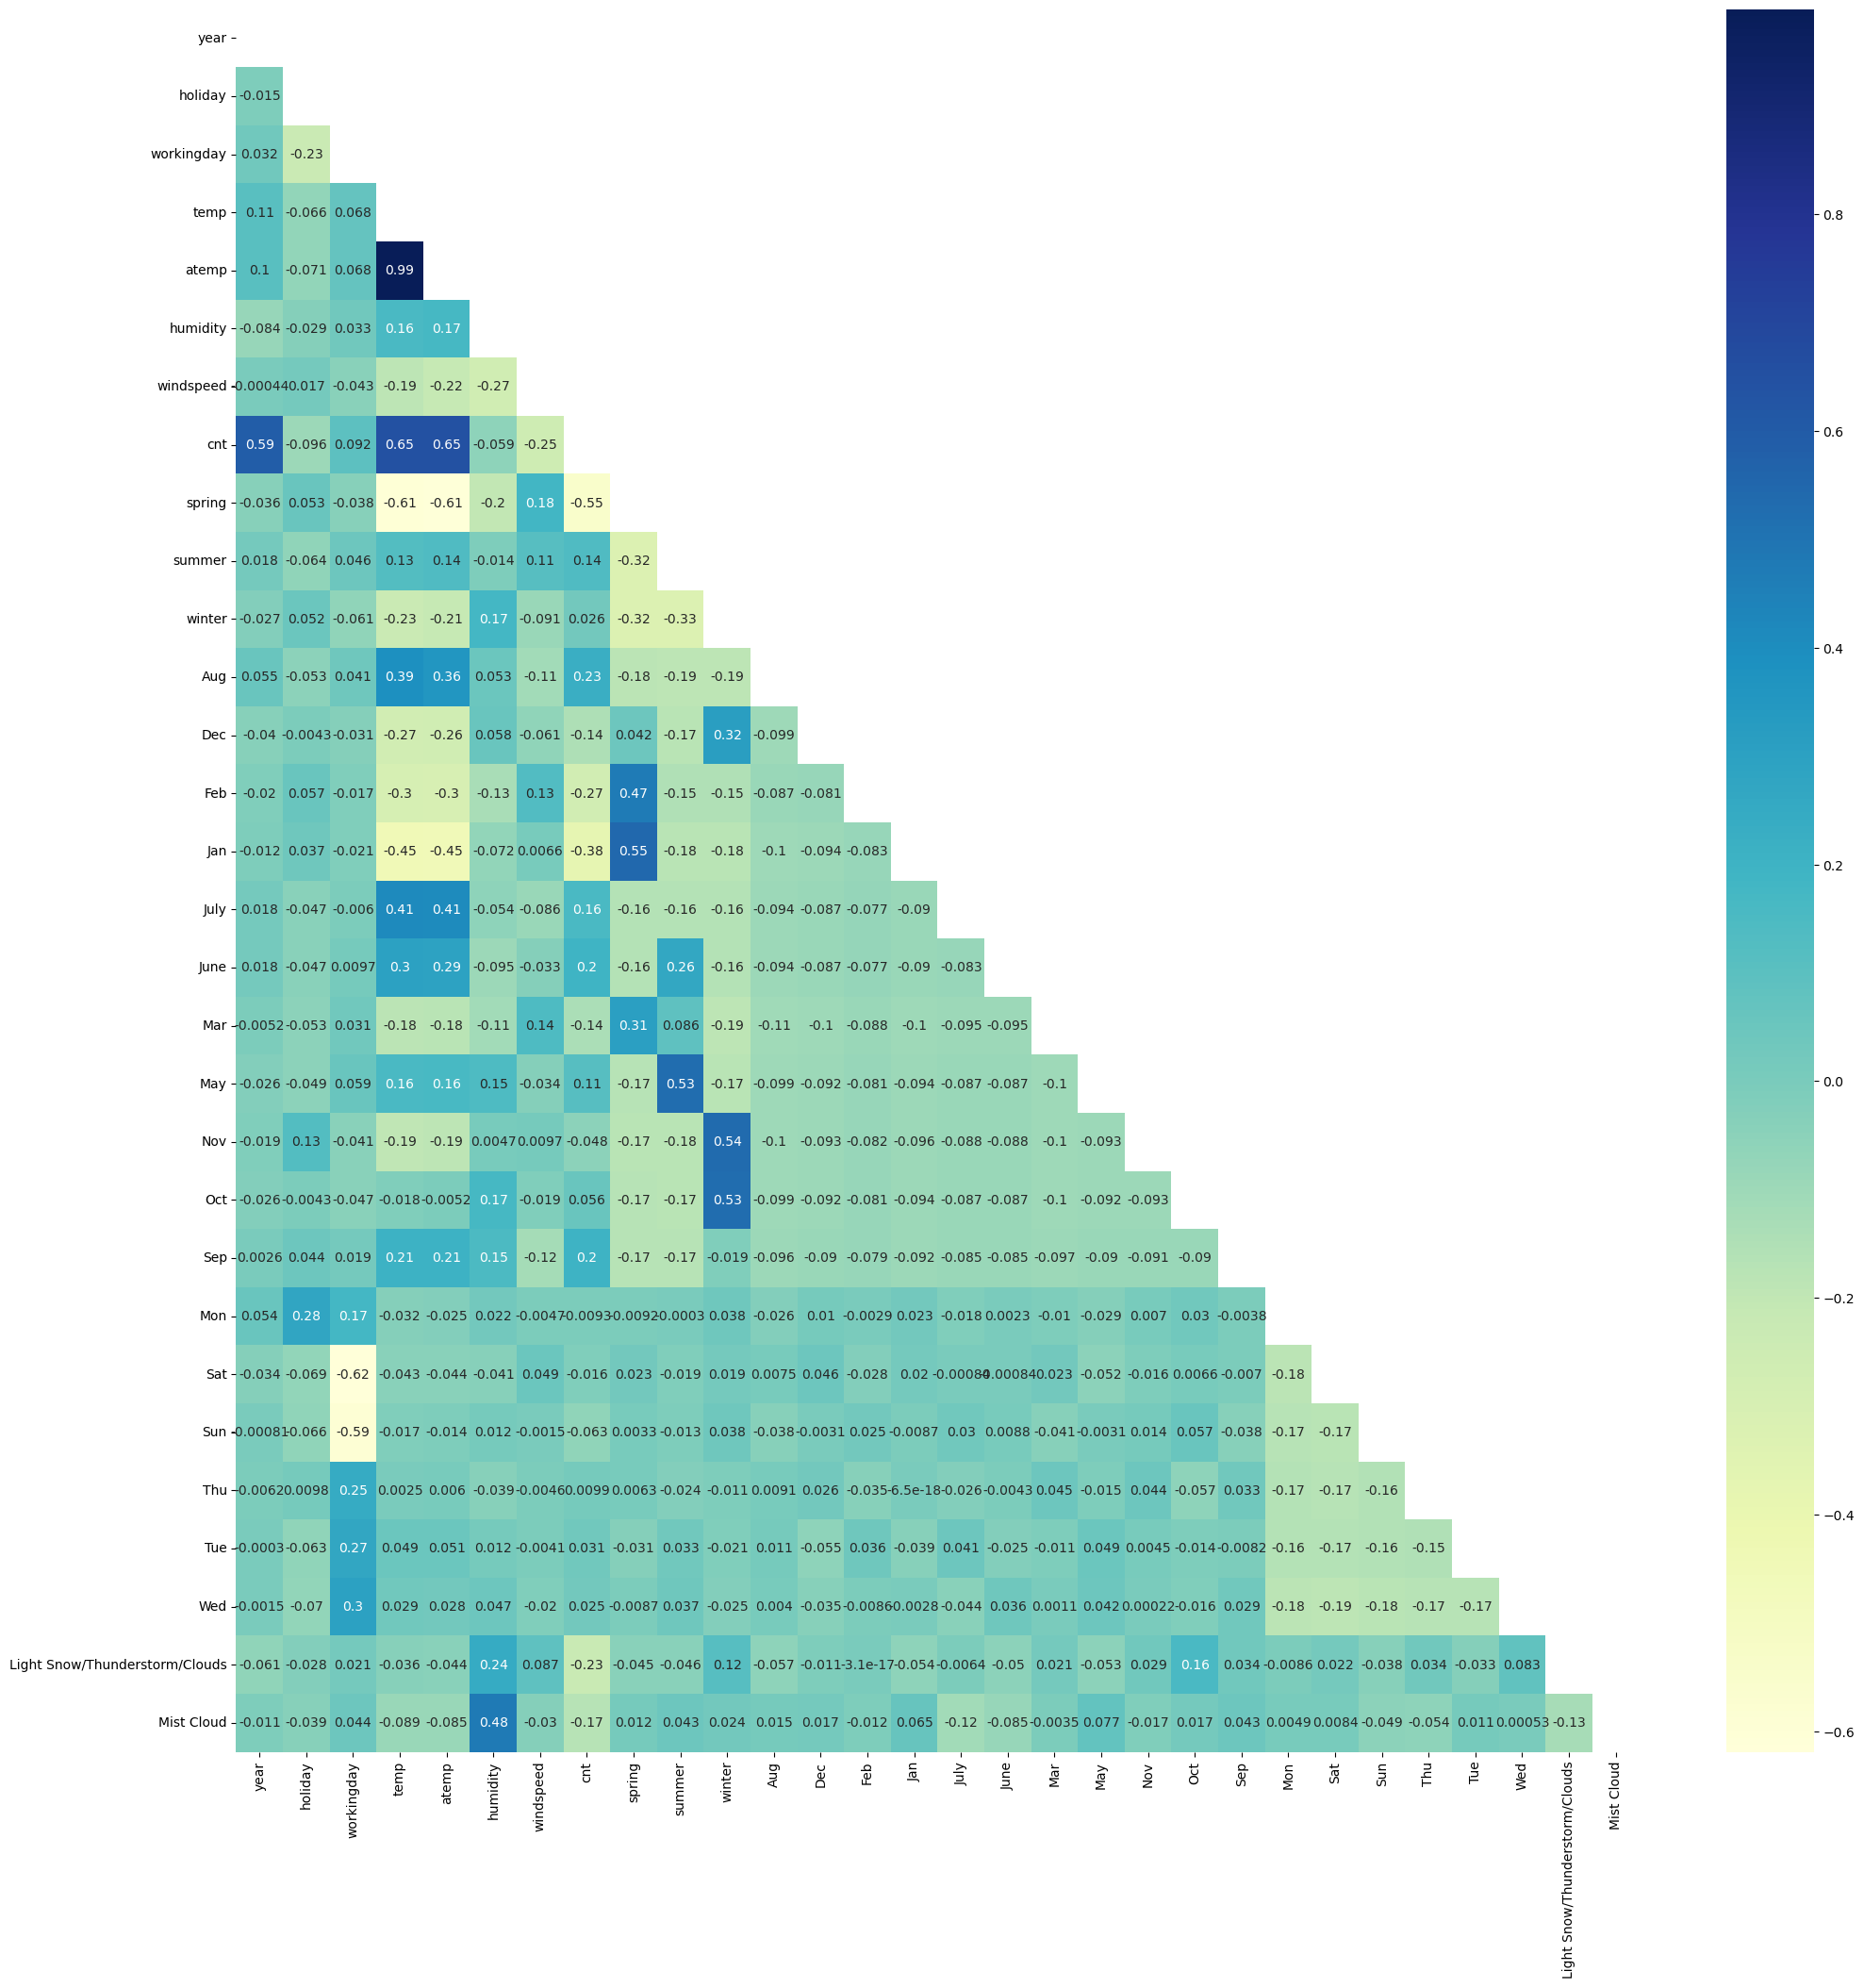

In [27]:
# Check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (24,24))
matrix = np.triu(df_train.corr())
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu", mask=matrix)
plt.show()

#### Observations from heatmap : 
     - cnt have good correlation with temp and year.
     - Also Spring season with Jan and Feb month , Summer season with May month , Winter season with Oct/Nov , Mist   Cloud shows co-relation with humidity. 

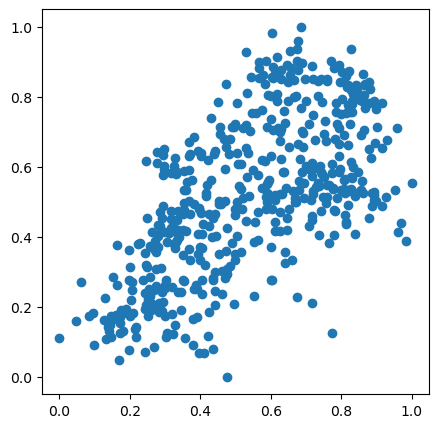

In [28]:
# Visualize target variable with temp to see the linear relationship. 
# Though with the help of pair plot we have already verified the same.

plt.figure(figsize=[5,5])
plt.scatter(df_train['temp'], df_train['cnt'])
plt.show()

## Step 5: Building a linear model

   #### Dividing train data into X and Y sets for the model building

In [29]:
y_train = df_train.pop('cnt')  # y_train df would have single column which is target variable cnt
X_train = df_train

#### RFE
    -Use Recursive feature elimination to discover top predictor variables.
    -RFE is an automated approach which helps in removing the least important features and thus reduce the training time, and increase the interpretability of the model.

In [30]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [31]:
#list the top 15 variables selected using RFE technique

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light Snow/Thunderstorm/Clouds', True, 1),
 ('Mist Cloud', True, 1)]

In [32]:
# Filtering the variables selected by RFE

col = X_train.columns[rfe.support_] 
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'spring', 'summer', 'winter', 'Jan', 'July', 'Sep', 'Sat',
       'Light Snow/Thunderstorm/Clouds', 'Mist Cloud'],
      dtype='object')


In [33]:
# Checking which columns has not been selected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Mon',
       'Sun', 'Thu', 'Tue', 'Wed'],
      dtype='object')

## Step 5: Building model using statsmodel, for the detailed statistics

In [34]:
# Creating X_train dataframe with RFE selected predictor variables
X_train_rfe = X_train[col]

In [35]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build first model
lm_first = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our first linear model
print(lm_first.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        04:32:42   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

#### Observations from summary : 
     - R-Squared /Adj R-squared seems very good. 
     - p values of all variables is less < 0.05 which is good indicator of significant variables.
     

#### Also check the VIF ...

In [36]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,spring,4.53
8,winter,3.46
7,summer,2.85
14,Mist Cloud,2.29
0,year,2.09
12,Sat,1.98


#### Observations from VIF stats :
    - humidity has VIF >5 . Remove it.

In [37]:
# humidity has high VIF value > 5 , remove it
X_train_rfe = X_train_rfe.drop(['humidity'], axis = 1)


In [38]:
#Calculate VIF again after removing 'humidity'
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,year,2.08
7,winter,1.98
11,Sat,1.97
8,Jan,1.62
9,July,1.59


#### As we have removed one variable with high VIF - re-train the model with remaining variables

In [39]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build second model
lm_second = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our second linear model
print(lm_second.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        04:32:48   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [40]:
#Calculate VIF for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,spring,3.07
6,summer,2.34
0,year,2.08
7,winter,1.98
11,Sat,1.97
8,Jan,1.62
9,July,1.59


In [41]:
# holiday has high p value value , remove it
X_train_rfe = X_train_rfe.drop(['holiday'], axis = 1)


In [42]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build third model
lm_third = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our third linear model
print(lm_third.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          8.68e-189
Time:                        04:32:49   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [43]:
#Calculate VIF for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,spring,2.99
5,summer,2.33
0,year,2.08
6,winter,1.91
10,Sat,1.84
7,Jan,1.62
8,July,1.59


In [44]:
# July has high p value value , remove it
X_train_rfe = X_train_rfe.drop(['July'], axis = 1)


In [45]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build 4th model
lm_fourth = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our fourth linear model
print(lm_fourth.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.44e-188
Time:                        04:32:52   Log-Likelihood:                 505.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [46]:
#Calculate VIF for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.53
1,workingday,4.68
3,windspeed,4.65
4,spring,2.87
0,year,2.07
5,summer,2.00
9,Sat,1.84
6,winter,1.76
7,Jan,1.61
11,Mist Cloud,1.58


In [47]:
# Month Jan has high p value value , remove it
X_train_rfe = X_train_rfe.drop(['Jan'], axis = 1)


In [48]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build 5th model
lm_fifth = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our fifth linear model
print(lm_fifth.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.42e-188
Time:                        04:33:03   Log-Likelihood:                 502.47
No. Observations:                 510   AIC:                            -980.9
Df Residuals:                     498   BIC:                            -930.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [49]:
#Calculate VIF for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.48
1,workingday,4.66
3,windspeed,4.64
4,spring,2.30
0,year,2.07
5,summer,2.00
8,Sat,1.83
6,winter,1.76
10,Mist Cloud,1.57
7,Sep,1.23


In [50]:
# Season Spring has high p value value , remove it
X_train_rfe = X_train_rfe.drop(['spring'], axis = 1)


In [51]:
# Adding a constant variable
X_train_rfe_sm = sm.add_constant(X_train_rfe)

#Build 6th model
lm_six = sm.OLS(y_train,X_train_rfe_sm).fit()   # Running the linear model

#Let's see the summary of our sixth linear model
print(lm_six.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          3.13e-188
Time:                        04:34:03   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [52]:
#Calculate VIF for new model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,Sat,1.69
4,summer,1.57
9,Mist Cloud,1.53
5,winter,1.40
6,Sep,1.20
8,Light Snow/Thunderstorm/Clouds,1.08


### NOTE :  As we can see now VIF values and p-values both are in acceptable range. So we can finalize this model. 

## Step 6 : Residual Analysis of the train data

    -So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions  of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [53]:
y_train_pred = lm_six.predict(X_train_rfe_sm)  #Doing predictions on the final 6th model. 

##### 1. Normality of error terms

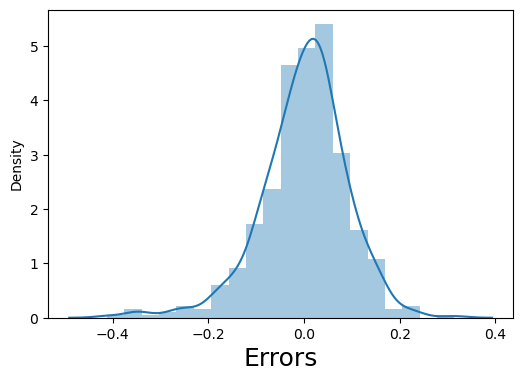

In [59]:
# Plotting the histogram of the error terms

plt.figure(figsize = (6,4))
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

#### Observations from above graph :
    - Error terms are normally distributed.

##### 2. Checking Multicollinearity 

In [60]:
#Calculate VIF for final model
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.04
3,windspeed,3.44
0,year,2.02
7,Sat,1.69
4,summer,1.57
9,Mist Cloud,1.53
5,winter,1.40
6,Sep,1.20
8,Light Snow/Thunderstorm/Clouds,1.08


#### Observations from VIF table
    - There is no Multicollinearity

##### 3.  Checking Homoscedasticity for error terms

In [ ]:
# Calculate residuals
residuals = y_train - y_train_pred

plt.figure(figsize = (6,4))
sns.scatterplot(y_train,y_train - y_train_pred)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Y_Train')
plt.ylabel('Residual')
plt.show()

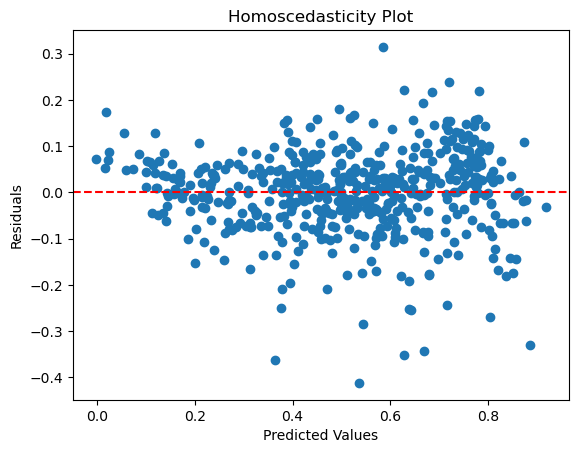

In [65]:
# Calculate residuals
residuals = y_train - y_train_pred

# Plot residuals against predicted values
plt.scatter(y_train_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Plot')
plt.show()

#### Observations from above graph : 
    - There is not any pattern in the variability of the residuals across the range of predicted values.

## Step 7 : Making Predictions with the finalized model

#### Scaling the test set

In [66]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars]) #Note: we will only transform() not fit_transform as we don't want model to learn anything from test dataset
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Thunderstorm/Clouds,Mist Cloud
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [67]:
#Verify scaling
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,spring,summer,...,Oct,Sep,Mon,Sat,Sun,Thu,Tue,Wed,Light Snow/Thunderstorm/Clouds,Mist Cloud
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [68]:
y_test = df_test.pop('cnt')
X_test = df_test

In [70]:
#Extract the same columns set as in final model.
X_test = X_test[X_train_rfe.columns]

# Adding constant variable to test dataframe
X_test_sm = sm.add_constant(X_test)

In [71]:
#Predict using final model
y_pred = lm_six.predict(X_test_sm)  #Don't forget to add constant in X_test

In [72]:
#Check r2_score
r2 = r2_score(y_test, y_pred)
round(r2,4)

0.7961

## Step 8 : Model Evaluation

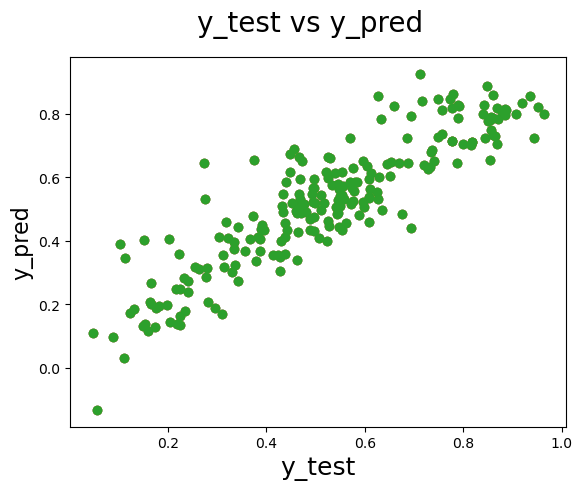

In [75]:
# Plotting y_test and y_pred to understand the spread

plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)     
plt.show()

In [77]:
round(lm_six.params,4)

const                             0.0750
year                              0.2331
workingday                        0.0561
temp                              0.5499
windspeed                        -0.1552
summer                            0.0886
winter                            0.1307
Sep                               0.0974
Sat                               0.0675
Light Snow/Thunderstorm/Clouds   -0.2871
Mist Cloud                       -0.0800
dtype: float64

We can see that the equation of our best fitted line is:

cnt = 0.0750 + 0.2331 * year + 0.0561 * workingday + 0.5499 * temp - 0.1552 * windspeed + 0.0886 * summer + 0.1308 * winter + 0.0974 * Sep + 0.0675 * Sat - 0.2871 * (Light Snow/Thunderstorm/Clouds) - 0.0800 * (Mist Cloud)

In [78]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2_value = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_value)

0.7864


## Comparison between Train and Test Dataset

<br>


|             | Train Set | Test Set   |
|----------   |-----------|----------  |
|  R^2        |  83.5    |  79.61      |
|  Adjusted R^2   |  83.2   |  78.64   |


<br>

# Conclusion : 
    - Demand of bikes depend on 10 predictor variables as explained by linear regression model.
    - Important predictor variables are temp , workingday , year , windspeed , summer , winter , Sep , Sat , Light Snow/Thunderstorm/Clouds , Mist Cloud